In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [31]:
df = pd.read_csv("./working_data/dataset.csv", index_col=0)

## Exploring the dataset

In [32]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Percentage of Missing Data': percent_missing, "Dtypes": df.dtypes})
display(missing_value_df)

,Percentage of Missing Data,Dtypes
Year,0.0,int64
Item,0.0,object
Yield (tonnes/ha),0.0,float64
Change (C),0.0,float64
Annual Mean Precipitation,0.0,float64
Air Temp Mean,0.0,float64
Frost Days,0.0,float64
Hot Days,0.0,float64
Ice Days,0.0,float64
Summer Days,0.0,float64


### Diving deep into the variables

Setting up the dataframe for the different tests

In [33]:
# getting list of names
categories = df["Category"].unique()

In [34]:
x = df[[ 
    'Change (C)', 'Annual Mean Precipitation',
    'Air Temp Mean', 'Frost Days', 'Hot Days', 
    'Ice Days', 'Summer Days','Sunshine Duration', 
    'Tropical Nights', 'Mean CO2 (ppm)', "Devil",	
    'Gustnado',	'Hail',	'Ice',	'Precip',	'Snow',	
    'Tornado',	'Wind', "Total"]]

y = df["Yield (tonnes/ha)"]

## Correlation Matrix for each Crop

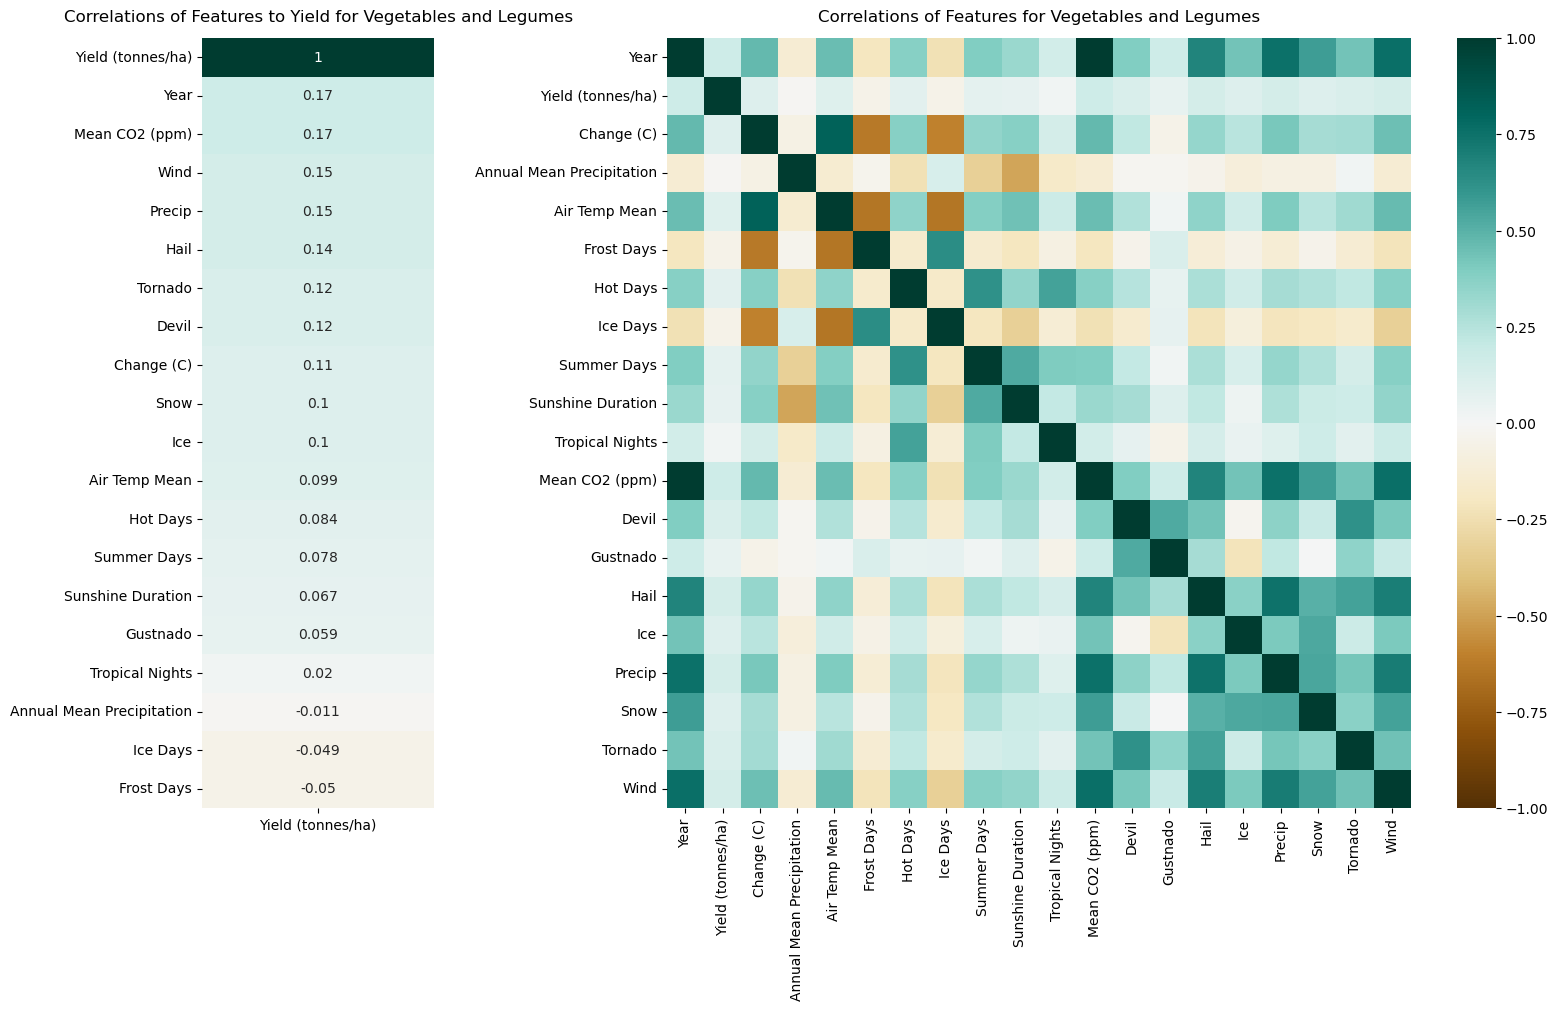

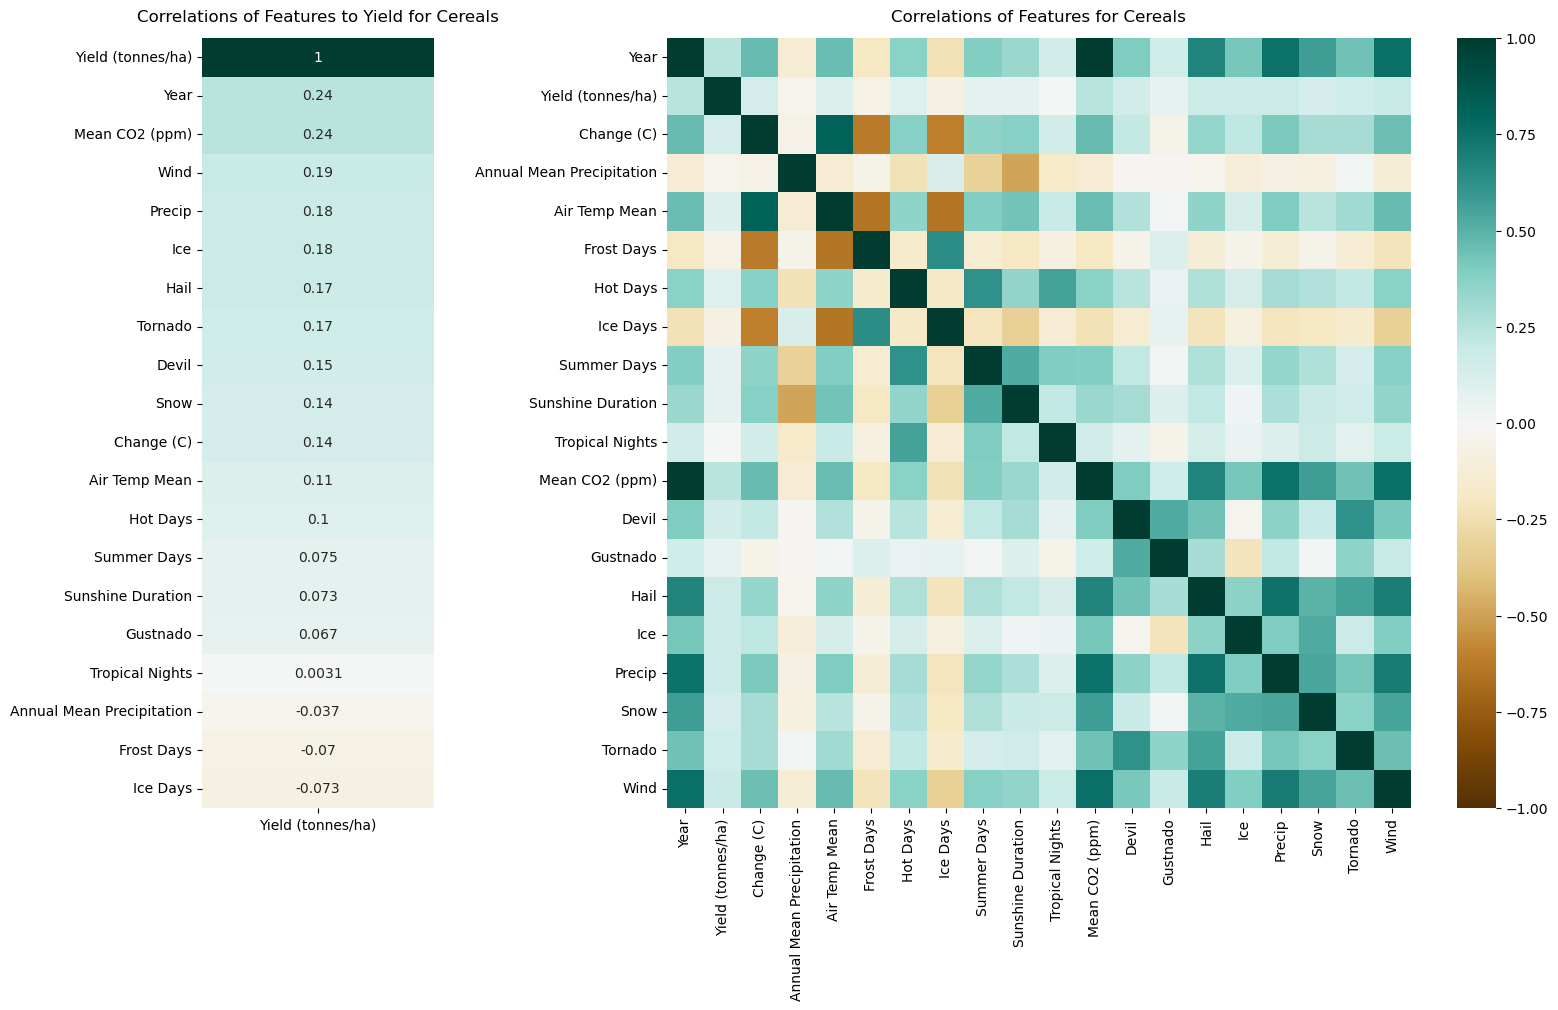

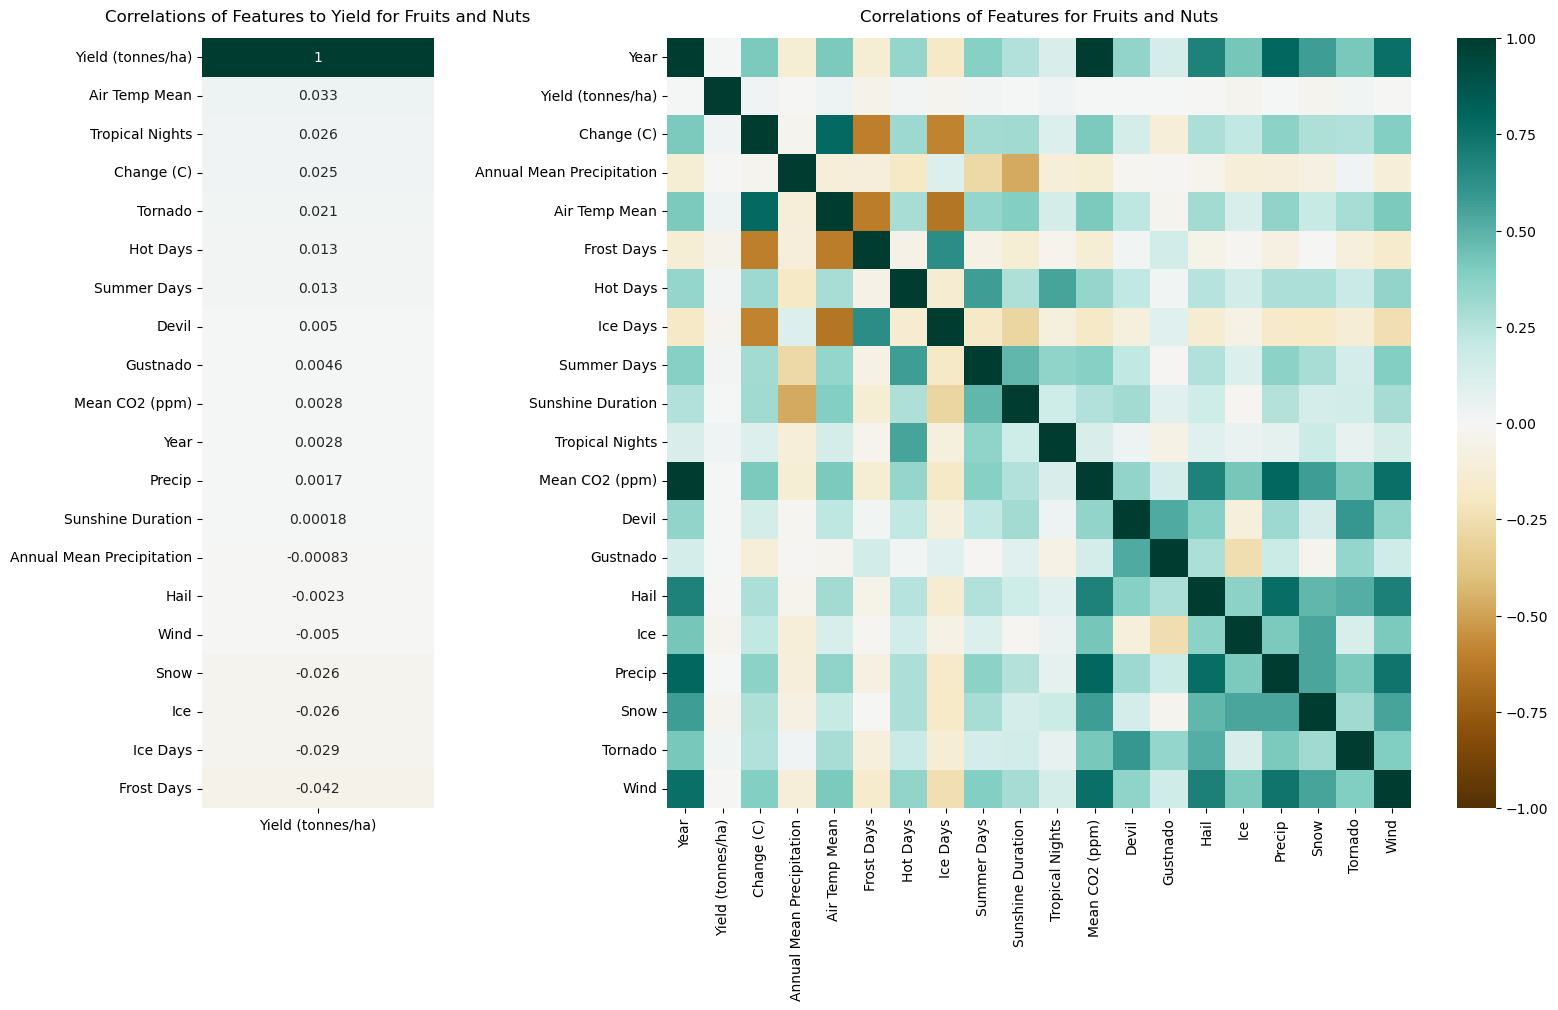

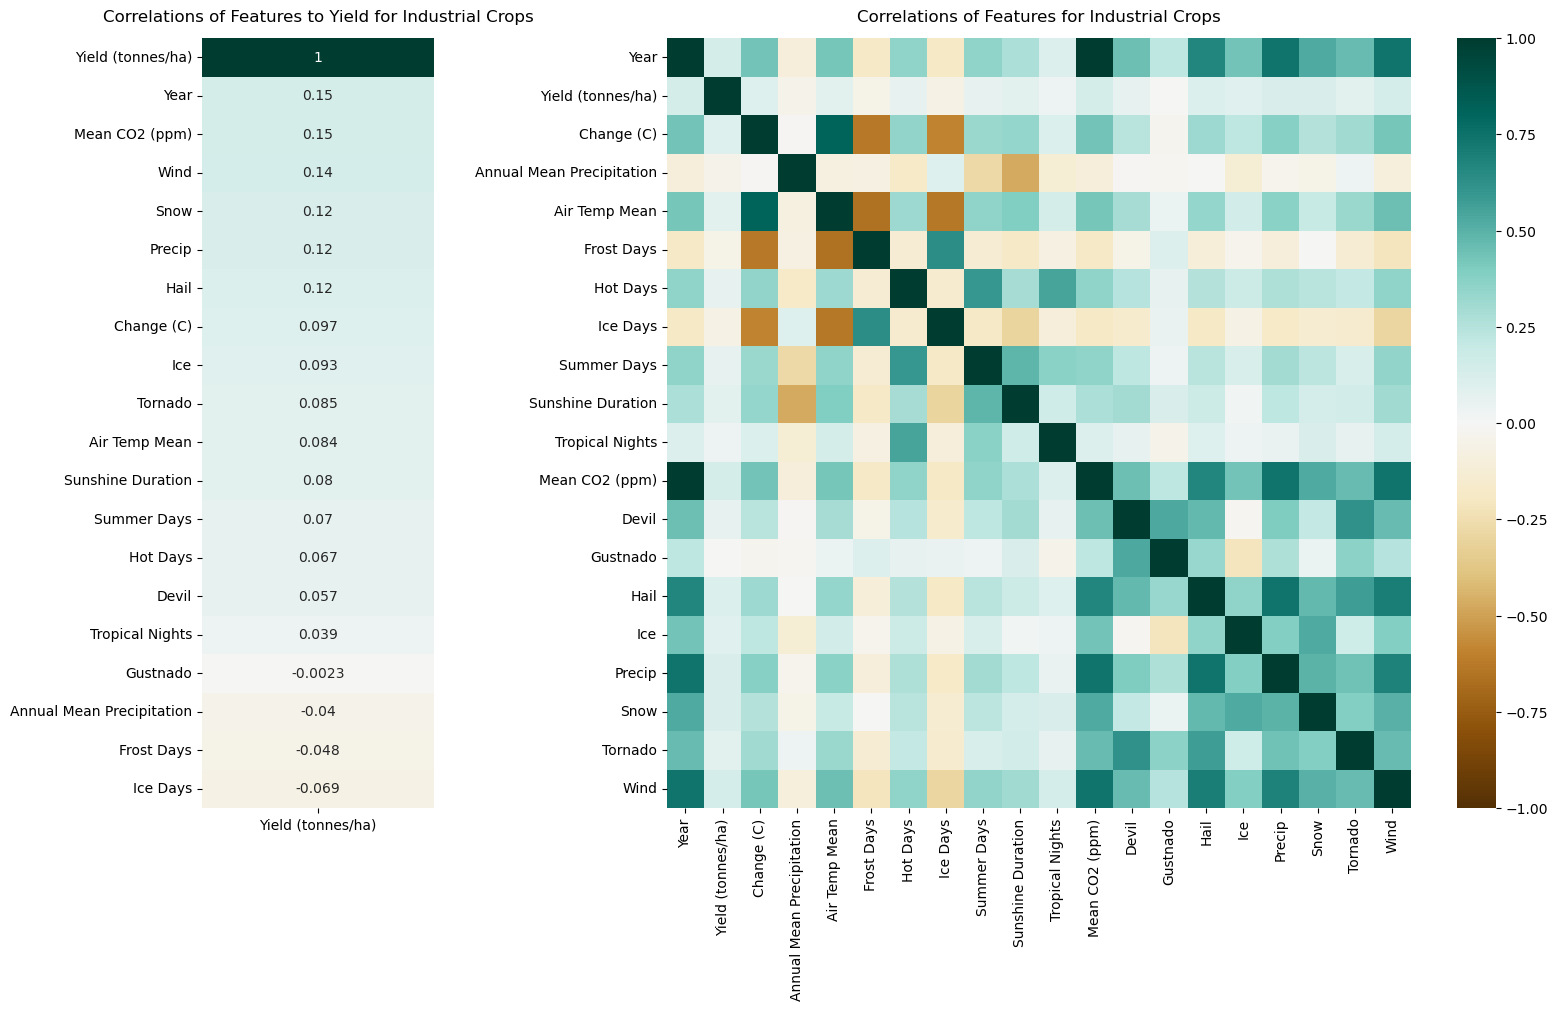

In [35]:
for cat in categories:
    crop_df = df[df["Category"] == cat]
    crop_df = crop_df.drop(["Total"], axis=1)

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 10), gridspec_kw={'width_ratios': [1, 4]})

    sns.heatmap(crop_df.corr(method="kendall")[['Yield (tonnes/ha)']].sort_values(by='Yield (tonnes/ha)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax1, cbar=False)
    ax1.set_title(f'Correlations of Features to Yield for {cat}', fontdict={'fontsize':12}, pad=12)

    sns.heatmap(crop_df.corr(method="kendall"), vmin=-1, vmax=1, cmap='BrBG', ax=ax2)
    ax2.set_title(f"Correlations of Features for {cat}", fontdict={'fontsize':12}, pad=12)

    plt.subplots_adjust(wspace=0.4)
    # Set the figsize of the first subplot
    #ax1.set_position([0.1, 0.1, 0.6, 0.8])

    # Set the figsize of the second subplot
    #ax2.set_position([0.75, 0.1, 0.2, 0.8])

    plt.show()

## Checking for Trends

Y - axis = Yield


X - axis =  Year

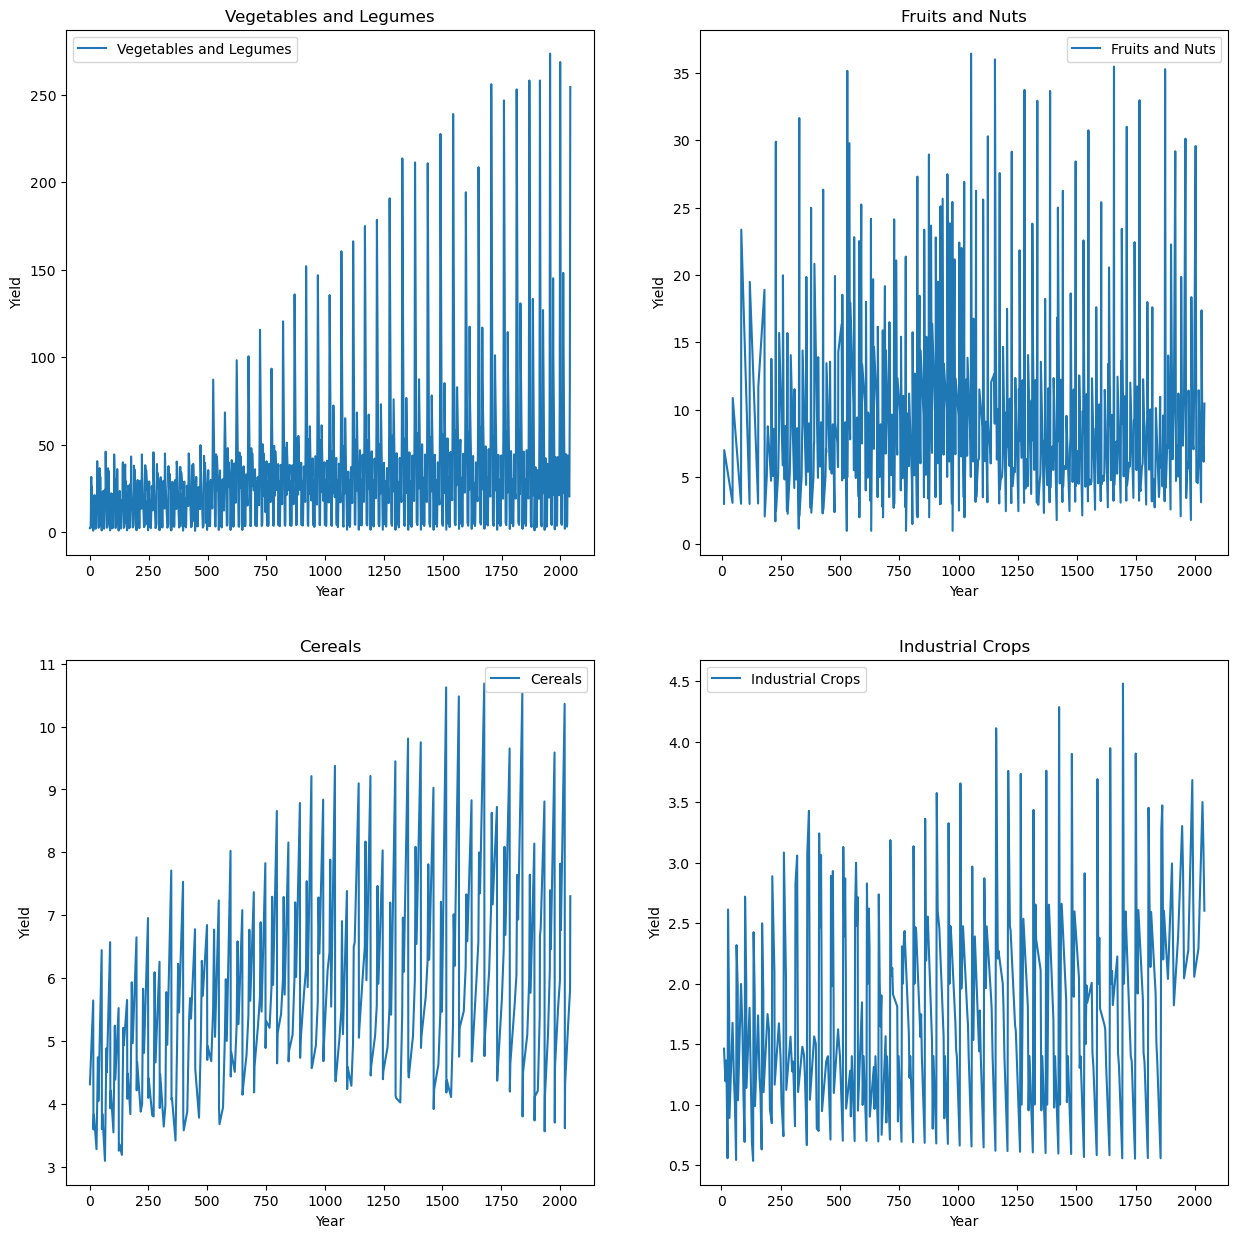

In [36]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15) )
count = 0
for cat in categories:
    crop_df = df[df["Category"] == cat]
    year_list = crop_df.index.values#["Year"]
    yield_data = crop_df["Yield (tonnes/ha)"]
    
    # Determine the row and column indices of the subplot
    row_idx = count % 2
    col_idx = count // 2
    
    # Select the appropriate subplot
    ax = axs[row_idx, col_idx]
    
    # Plot the yield data for the current item on the subplot
    ax.plot(year_list, yield_data, label=cat)
    
    # Set the title and axis labels for the subplot
    ax.set_title(cat)
    ax.set_xlabel('Year')
    ax.set_ylabel('Yield')
    
    # Add a legend to the subplot
    ax.legend()
    
    # change axis
    count +=1

plt.subplots_adjust(wspace=0.2, hspace=0.2)
# Show the figure
plt.show()

## Checking for Seasonality and Trend

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
pd.options.mode.chained_assignment = None  # default='warn'

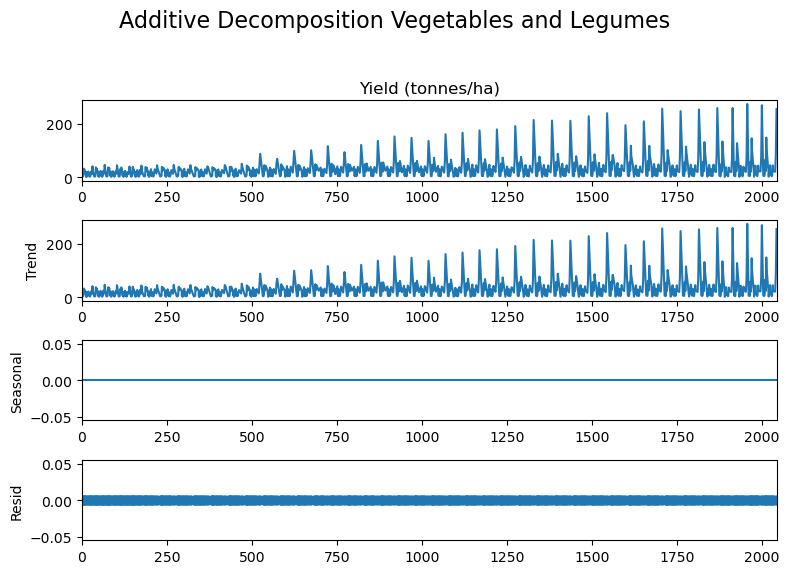

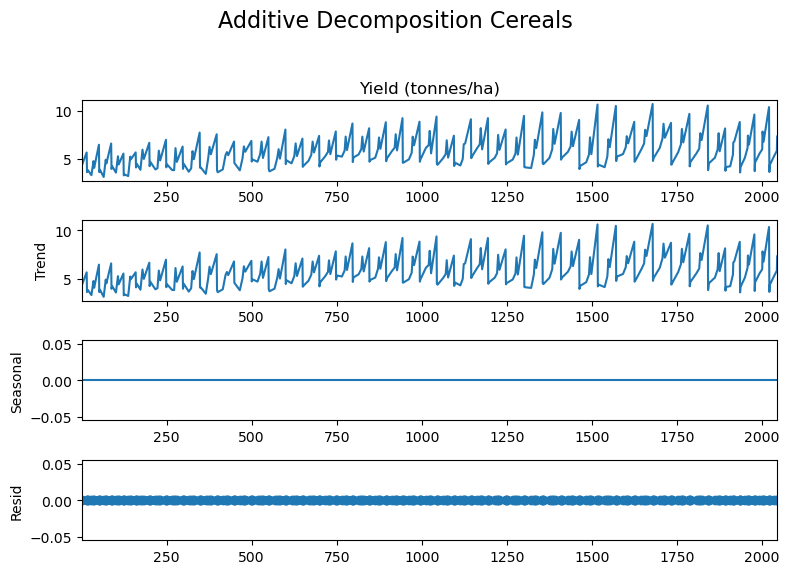

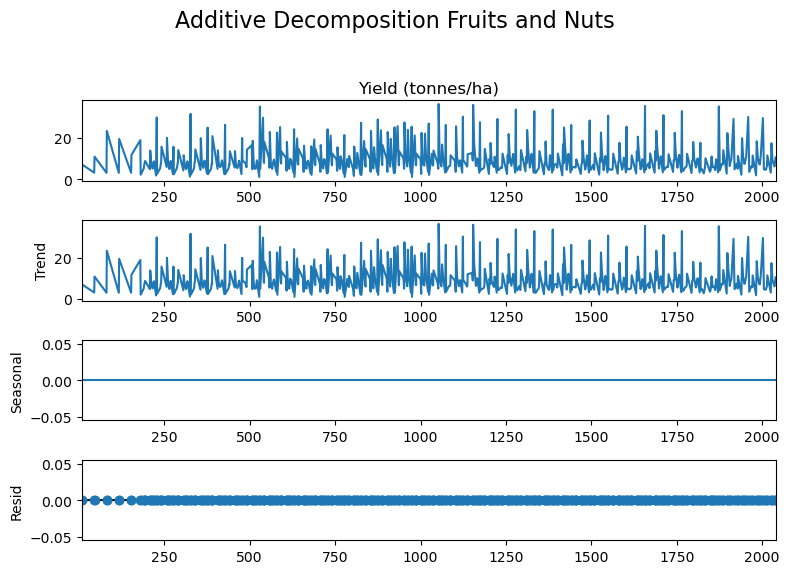

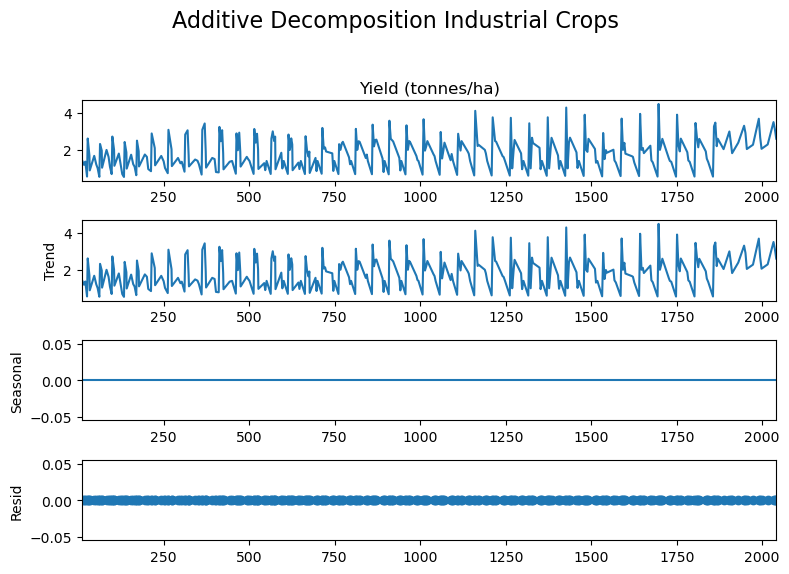

In [38]:
# Loop over each independent variable and plot against the dependent variable
for cat in categories:
    crop_df = df[df["Category"] == cat]

    decomp_add = seasonal_decompose(crop_df["Yield (tonnes/ha)"], model="additive", period=1)
    
    plt.rcParams.update({'figure.figsize': (8,6)})
    decomp_add.plot().suptitle(f'Additive Decomposition {cat}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


## ADF Test for Stationarity

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
stat = {}
non_stat = {}

for cate in categories:
    crop_df = df[df["Category"] == cate ]
    num_cols = crop_df.select_dtypes(include=[np.number])
    nstat = []
    sstat = []
    for col in num_cols:
        # perform ADF test to check stationarity
        adf_result = adfuller(crop_df[col])
        if adf_result[1] > 0.05:
            nstat.append(col)
            
        else:
            sstat.append(col)
    non_stat[cate] = nstat
    stat[cate] = sstat

print("Stationary:", stat)
print("Not Stationary:", non_stat)

Stationary: {'Vegetables and Legumes': ['Yield (tonnes/ha)', 'Change (C)', 'Annual Mean Precipitation', 'Air Temp Mean', 'Frost Days', 'Hot Days', 'Ice Days', 'Summer Days', 'Sunshine Duration', 'Tropical Nights', 'Devil', 'Gustnado', 'Ice'], 'Cereals': ['Annual Mean Precipitation', 'Air Temp Mean', 'Frost Days', 'Ice Days', 'Tropical Nights', 'Gustnado'], 'Fruits and Nuts': ['Yield (tonnes/ha)', 'Change (C)', 'Annual Mean Precipitation', 'Air Temp Mean', 'Frost Days', 'Hot Days', 'Ice Days', 'Summer Days', 'Sunshine Duration', 'Tropical Nights', 'Gustnado', 'Ice'], 'Industrial Crops': ['Change (C)', 'Annual Mean Precipitation', 'Air Temp Mean', 'Frost Days', 'Hot Days', 'Ice Days', 'Summer Days', 'Sunshine Duration', 'Tropical Nights', 'Gustnado']}
Not Stationary: {'Vegetables and Legumes': ['Year', 'Mean CO2 (ppm)', 'Hail', 'Precip', 'Snow', 'Tornado', 'Wind', 'Total'], 'Cereals': ['Year', 'Yield (tonnes/ha)', 'Change (C)', 'Hot Days', 'Summer Days', 'Sunshine Duration', 'Mean CO2 (p

## Checking PACF for lag

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

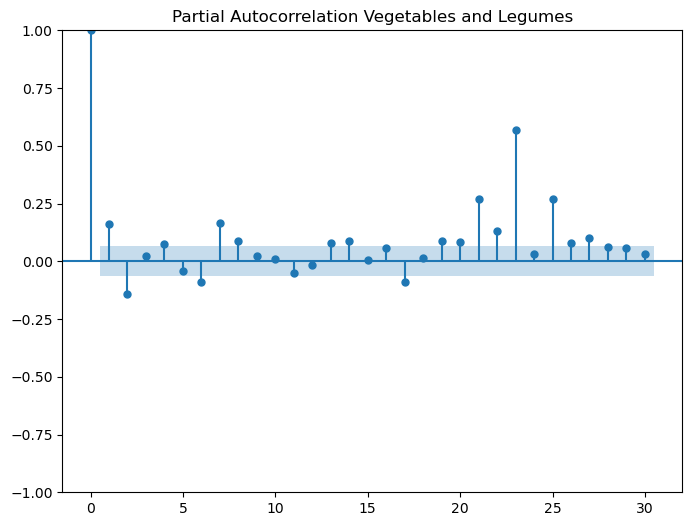

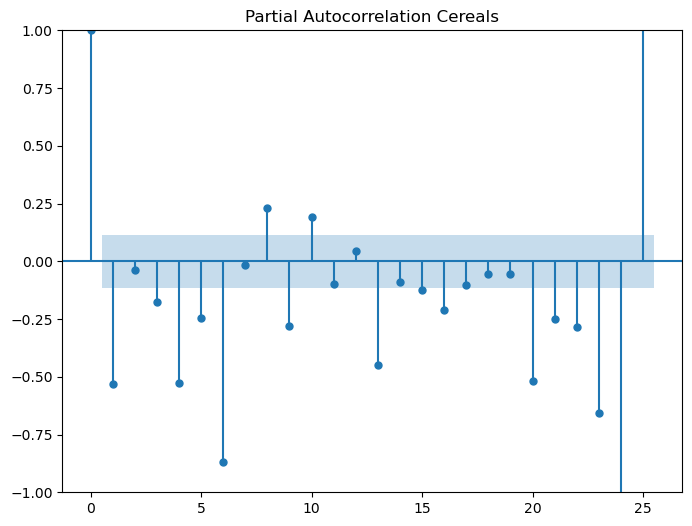

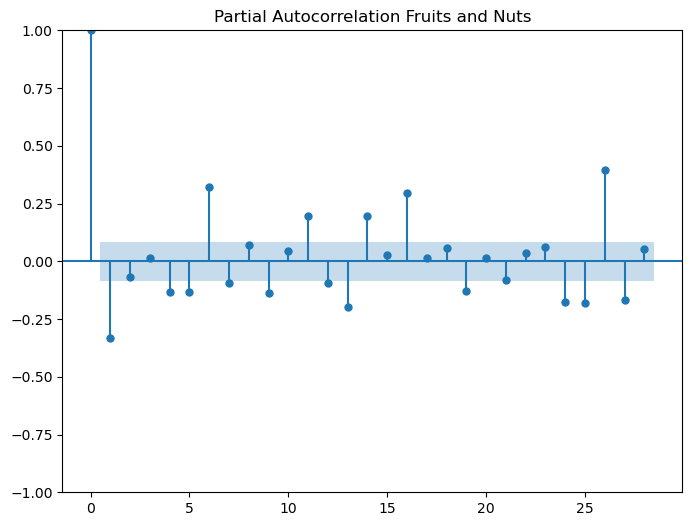

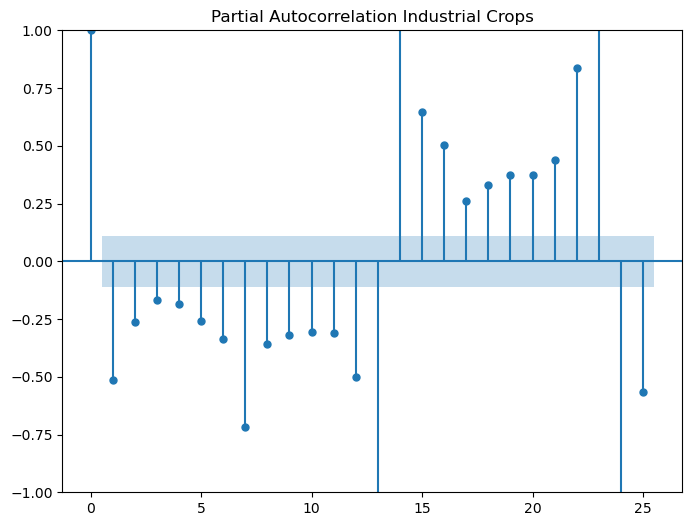

In [44]:
for cat in categories:
    crop_df = df[df["Category"] == cat]
    adf_result = adfuller(crop_df["Yield (tonnes/ha)"])
    while adf_result[1] > 0.05:
        crop_df["Yield (tonnes/ha)"] = crop_df["Yield (tonnes/ha)"].diff()
        crop_df = crop_df.dropna()
        adf_result = adfuller(crop_df["Yield (tonnes/ha)"])

    plot_pacf(crop_df["Yield (tonnes/ha)"], title= f"Partial Autocorrelation {cat}")    